In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np
import pandas as pd

In [8]:
data = pd.read_csv('train.csv')
aug = pd.read_csv('aug_train_data_only_one.csv')
aug_u = pd.read_csv('aug_train_data_under.csv')

## 원래 train 데이터

In [9]:
# 1. 데이터셋 크기 및 결측치 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9324 entries, 0 to 9323
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            9324 non-null   object 
 1   source        9324 non-null   object 
 2   sentence_1    9324 non-null   object 
 3   sentence_2    9324 non-null   object 
 4   label         9324 non-null   float64
 5   binary-label  9324 non-null   float64
dtypes: float64(2), object(4)
memory usage: 437.2+ KB


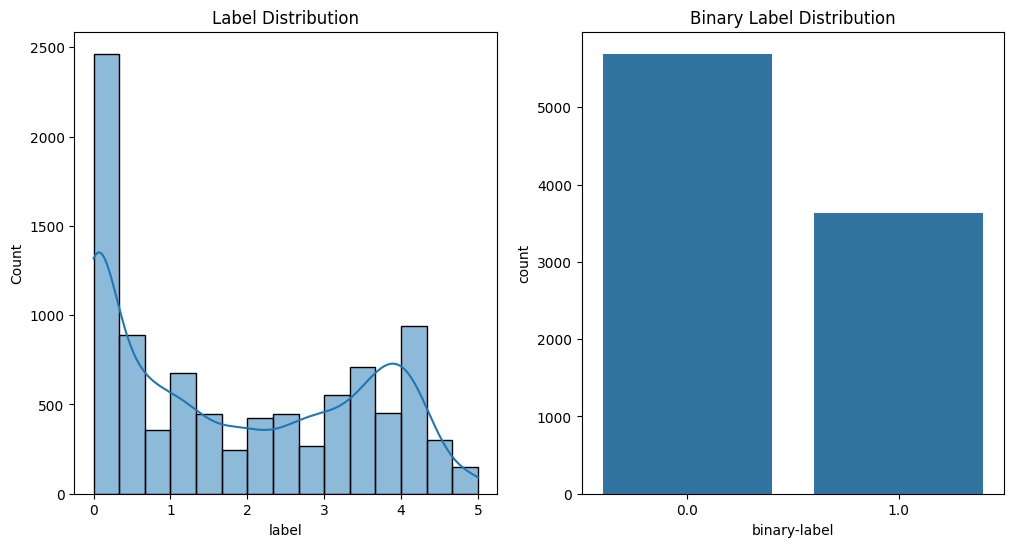

In [12]:
# 2. Label과 Binary Label 분포 확인
plt.figure(figsize=(12, 6))

# Label 분포
plt.subplot(1, 2, 1)
sns.histplot(data['label'], bins=15, kde=True)
plt.title('Label Distribution')

# Binary Label 분포
plt.subplot(1, 2, 2)
sns.countplot(x='binary-label', data=data)
plt.title('Binary Label Distribution')

plt.show()

## swap sentence만 진행

In [10]:
aug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16529 entries, 0 to 16528
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    16529 non-null  int64  
 1   id            16529 non-null  object 
 2   source        16529 non-null  object 
 3   sentence_1    16529 non-null  object 
 4   sentence_2    16529 non-null  object 
 5   label         16529 non-null  float64
 6   binary-label  16529 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 904.1+ KB


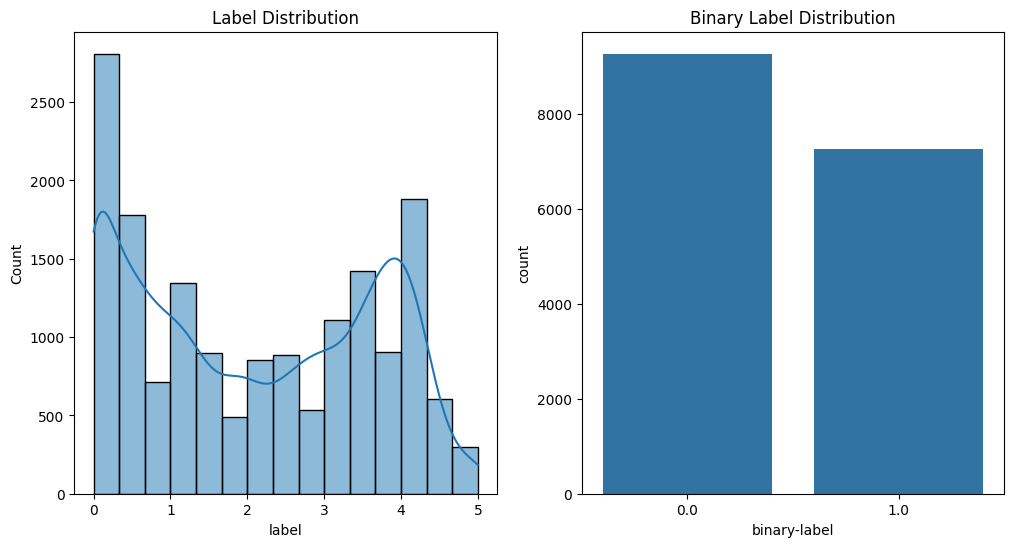

In [5]:
# 2. Label과 Binary Label 분포 확인
plt.figure(figsize=(12, 6))

# Label 분포
plt.subplot(1, 2, 1)
sns.histplot(aug['label'], bins=15, kde=True)
plt.title('Label Distribution')

# Binary Label 분포
plt.subplot(1, 2, 2)
sns.countplot(x='binary-label', data=aug)
plt.title('Binary Label Distribution')

plt.show()

## label 0 under sampling과 label 5 증강

In [11]:
aug_u.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16529 entries, 0 to 16528
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    16529 non-null  int64  
 1   id            16529 non-null  object 
 2   source        16529 non-null  object 
 3   sentence_1    16529 non-null  object 
 4   sentence_2    16529 non-null  object 
 5   label         16529 non-null  float64
 6   binary-label  16529 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 904.1+ KB


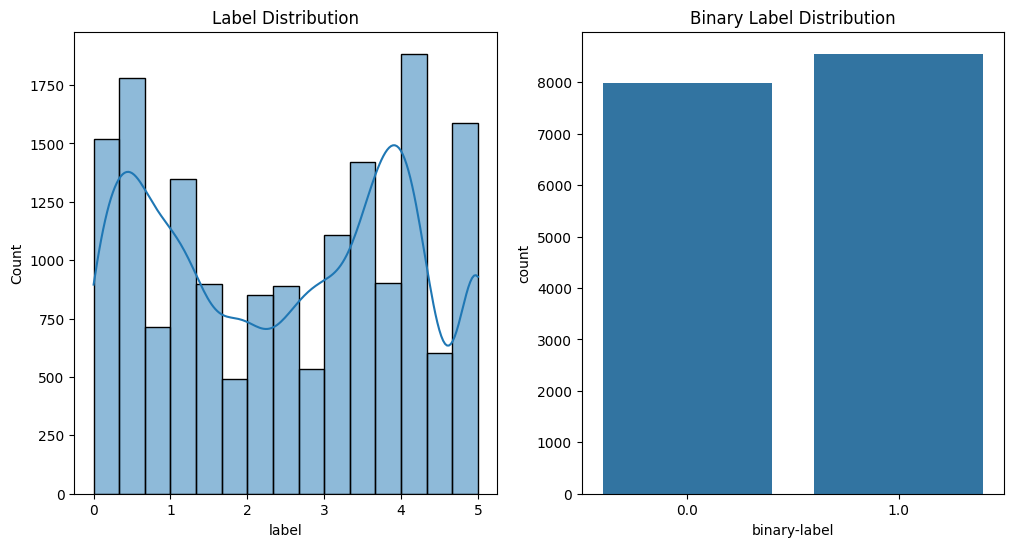

In [6]:
# 2. Label과 Binary Label 분포 확인
plt.figure(figsize=(12, 6))

# Label 분포
plt.subplot(1, 2, 1)
sns.histplot(aug_u['label'], bins=15, kde=True)
plt.title('Label Distribution')

# Binary Label 분포
plt.subplot(1, 2, 2)
sns.countplot(x='binary-label', data=aug_u)
plt.title('Binary Label Distribution')

plt.show()

### under sampling한 label 0 데이터에서 sentence 1을 2에 cooy하여 label 5 증강

In [7]:
aug_u[aug_u.label == 5.0].tail(20)

,Unnamed: 0,id,source,sentence_1,sentence_2,label,binary-label
16509,9127,boostcamp-sts-v1-train-9127,slack-sampled,운봉산장을 가고싶지만...,운봉산장을 가고싶지만...,5.0,1.0
16510,9135,boostcamp-sts-v1-train-9135,slack-sampled,맞아요 저도저도!!,맞아요 저도저도!!,5.0,1.0
16511,9153,boostcamp-sts-v1-train-9153,slack-sampled,여러분도 한 번 해보세요..,여러분도 한 번 해보세요..,5.0,1.0
16512,9171,boostcamp-sts-v1-train-9171,slack-sampled,제2조에 규정된 보유 기간과 일치함,제2조에 규정된 보유 기간과 일치함,5.0,1.0
16513,9172,boostcamp-sts-v1-train-9172,nsmc-sampled,사람손가락이 이렇게 무서운겁니다,사람손가락이 이렇게 무서운겁니다,5.0,1.0
16514,9175,boostcamp-sts-v1-train-9175,nsmc-sampled,공아정...말 안되는 캐릭터인 것은 알겠지만 제발 옷이라도 똑바로 입고 있었으면...,공아정...말 안되는 캐릭터인 것은 알겠지만 제발 옷이라도 똑바로 입고 있었으면...,5.0,1.0
16515,9179,boostcamp-sts-v1-train-9179,slack-sampled,그러나 내부는 매우 넓고 멋진 식당.,그러나 내부는 매우 넓고 멋진 식당.,5.0,1.0
16516,9180,boostcamp-sts-v1-train-9180,nsmc-sampled,흠 여자 웃음소리 때문에 집중도도 떨어졌음...,흠 여자 웃음소리 때문에 집중도도 떨어졌음...,5.0,1.0
16517,9188,boostcamp-sts-v1-train-9188,slack-sampled,"좋은 계절, 좋은 사람들...","좋은 계절, 좋은 사람들...",5.0,1.0
16518,9200,boostcamp-sts-v1-train-9200,nsmc-sampled,니콜라스 케이지 전성기 시절 작품.,니콜라스 케이지 전성기 시절 작품.,5.0,1.0
